# Visualisation 3D et widgets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipyvolume as ipv
import ipywidgets as widgets

from matplotlib import cm

%matplotlib inline


In [17]:
class Dog:
    def __init__(self, name, age, weight, size):
        self.name = name
        self.age = age
        self.weight = weight
        self.size = size
        self.bmi = self.weight / (self.size/100)**2
        
    def bak(self):
        print('whoa')
#     @property   
#     def bmi(self):
#         return self.weight / (self.size/100)**2
        
    
    

In [18]:
medor = Dog("Médor", 3, 6, 85)

In [21]:
medor.weight -= 1
medor.bmi


6.920415224913495

In [3]:
cmap = cm.get_cmap("Reds_r")

def normalize(data):
    return (data - data.min()) / (data.max() - data.min())

In [22]:
low = np.quantile(col_data.yC12H26, 0.9)
high = np.quantile(col_data.yC12H26, 1)


In [24]:
col_data.yC12H26.max()

0.28376532

In [19]:
data_f = col_data[(col_data.yC12H26 > low) & (col_data.yC12H26 < high)]

In [20]:
data_f.shape

(38882, 5)

In [23]:
import ipywidgets as widgets
from ipywidgets import interact

$$
\sum_\infty x_i
$$

In [50]:
f"2 +2 égale {2 + 2} "
f"π égale {np.pi:6f} "


'π égale 3.141593 '

In [ ]:
Ψ

In [48]:
def f(x):
    return x

interact(f, x=widgets.IntSlider(min=-30, max=30, step=1, value=10));


interactive(children=(IntSlider(value=10, description='x', max=30, min=-30), Output()), _dom_classes=('widget-…

In [24]:

w = widgets.IntSlider()
display(w)


IntSlider(value=0)

In [55]:
from IPython.display import display
button = widgets.Button(description="Click Me!")
#output = widgets.Output()

display(button)#, output)

def on_button_clicked(btn):
    #with output:
    btn.description = "I was clicked"
    print("Button clicked.")

button.on_click(on_button_clicked)

Button(description='Click Me!', style=ButtonStyle())

Button clicked.


In [54]:
button.description

'Click Me!'

In [47]:
print(w.value)

50


In [31]:
interact?

In [31]:
data = pd.read_csv(
    "ifpen_data/SOLUTION3D/ASCII_COLUMN_FILE/sprayA000015_+1.40019e-03.col",
    sep="\s+", header=1)
data.head()
data[["x", "y", "z"]] *= 1e3

In [44]:
def slicer(data, sliced_col, quantile=0.9, num_points=500):
    thresh = np.quantile(data[sliced_col], quantile)
    data_f = (data[data[sliced_col] > thresh]
              .sort_values(sliced_col)
              .iloc[:num_points]
              .reset_index())
    return data_f


class Slicer3D(widgets.VBox):
    
    
    def __init__(self, data, sliced_col, quantile=0.9, num_points=500):
        
        self.data = data
        self.sliced_col = sliced_col
        
        self.data_f = slicer(
            self.data,
            self.sliced_col,
            quantile=quantile,
            num_points=num_points
        )
        ipv.clear()
        self.scatter = ipv.scatter(
            x=data_f.x.to_numpy(),
            y=data_f.y.to_numpy(),
            z=data_f.z.to_numpy(),
            size=0.5,
            color="r")
        self.fig = ipv.gcf()
        ipv.squarelim()

        self.quant_setter = widgets.FloatSlider(value=0.9, min=0.01, max=0.99, step=0.01)
        self.quant_setter.observe(self.slice_callback)

        self.np_setter = widgets.IntSlider(value=500, min=10, max=2000)
        self.np_setter.observe(self.slice_callback)
        #self.widget = widgets.VBox([self.fig, self.quant_setter, self.np_setter])
        widgets.VBox.__init__(self, [self.fig, self.quant_setter, self.np_setter])
    
    
    def slice_callback(self, w):

        self.data_f = slicer(
            self.data,
            self.sliced_col,
            quantile=self.quant_setter.value,
            num_points=self.np_setter.value
        )

        for coord in "xyz":
            setattr(self.scatter, coord, self.data_f[coord])



In [45]:
%pdb

Automatic pdb calling has been turned OFF


In [46]:
slicer3D = Slicer3D(data, "x")
slicer3D.widget

In [60]:
type(fig)

ipyvolume.widgets.Figure

In [77]:
scatter.x = data_f.x.to_numpy()*1e3
scatter.y = data_f.y.to_numpy()*1e3
scatter.z = data_f.z.to_numpy()*1e3


In [79]:
from IPython.display import HTML

In [87]:
html = widgets.HTML(col_data.head().to_html())
display(html)

HTML(value='<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></…

In [90]:
html.value = col_data.head().to_html()

In [85]:
widgets.HBox([widgets.HTML(col_data.head().to_html()),])

In [4]:
bins = pd.DataFrame(columns=list("xyz"))
for c in 'xyz':

    col_data['c'+c], bins[c] = pd.cut(col_data[c], 60, retbins=True)
    

In [12]:
gridded = col_data.groupby(['cx', 'cy', 'cz'])['yC12H26'].mean()

In [8]:
60 * 60 * 60

216000

In [13]:
gridded_ = gridded.replace(np.nan, 0).to_numpy().reshape((60, 60, 60))

In [14]:
np.all(np.isfinite(gridded_))

True

In [16]:
ipv.clear()
ipv.volshow(gridded_)
ipv.show()

/home/humancoders/miniconda3/envs/ifpen/lib/python3.7/site-packages/ipyvolume/serialize.py:81: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


In [9]:
col_data.shape

(432023, 5)

In [93]:
%conda install pytables

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\hcodeur1\.conda\envs\formation

  added / updated specs:
    - pytables


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    numexpr-2.7.0              |   py37hdce8814_0         130 KB
    ------------------------------------------------------------
                                           Total:         130 KB

The following NEW packages will be INSTALLED:

  blosc              pkgs/main/win-32::blosc-1.16.3-h7bd577a_0
  lzo                pkgs/main/win-32::lzo-2.10-h00ab751_2
  mock               pkgs/main/win-32::mock-3.0.5-py37_0
  numexpr            pkgs/main/win-32::numexpr-2.7.0-py37hdce8814_0
  pytables           pkgs/main/win-32::pytables-3.5.2-py37h1da0976_1
  snappy             pkgs/main/win-32::snappy-1.1.7-h8327587_3

The following packages will be UPDATED:

  ca-certificates    con



==> WARNING: A newer version of conda exists. <==
  current version: 4.7.10
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda




In [125]:


food = pd.read_csv(
    "https://github.com/glyg/formation_IFPEN/raw/master/data/openfoodfacts_short.csv", sep=',')

with pd.HDFStore('test.h5', mode='w') as store:
    store.append('spray', col_data, format='table')
    store.append('food', food,  format='table', data_columns=['fat_100g', 'sugars_100g'])


In [114]:
import os
import sys

os.isfile()

In [127]:
with pd.HDFStore('test.h5') as store:
    food_ = store.select('food', where='fat_100g > 10 & sugars_100g > 20')

In [128]:
food_['fat_100g'].min()

10.1

In [131]:
food.shape

(9758, 9)

In [130]:
food_.shape

(1326, 9)

In [129]:
food_['sugars_100g'].min()

20.1

In [120]:
import os
if os.path.isfile('test.h5'):
    os.remove('test.h5')

In [27]:
from scipy.io import loadmat
import numpy as np
import pandas as pd

In [31]:
mat = loadmat(
    "original_mono_Result_20171206_103120.3793.mat",
    squeeze_me=True,
    chars_as_strings=True,
    struct_as_record=False
)


In [32]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'DnsAng', 'DnsCmb', 'DnsCrb', 'DnsEss', 'DnsMtr', 'DnsCyl', 'CycMtr', 'CycMoy', 'GrdPnt', 'GrdMRP'])

In [39]:
dnsmtr = mat['CycMtr']

In [40]:
dnsmtr.AngVlb

array([[4.54747351e-14, 1.00000000e-01, 2.00000000e-01, ...,
        7.19700000e+02, 7.19800000e+02, 7.19900000e+02],
       [4.54747351e-14, 1.00000000e-01, 2.00000000e-01, ...,
        7.19700000e+02, 7.19800000e+02, 7.19900000e+02],
       [4.54747351e-14, 1.00000000e-01, 2.00000000e-01, ...,
        7.19700000e+02, 7.19800000e+02, 7.19900000e+02],
       ...,
       [4.54747351e-14, 1.00000000e-01, 2.00000000e-01, ...,
        7.19700000e+02, 7.19800000e+02, 7.19900000e+02],
       [4.54747351e-14, 1.00000000e-01, 2.00000000e-01, ...,
        7.19700000e+02, 7.19800000e+02, 7.19900000e+02],
       [4.54747351e-14, 1.00000000e-01, 2.00000000e-01, ...,
        7.19700000e+02, 7.19800000e+02, 7.19900000e+02]])

In [7]:
dnsmtr

array(('Standard', 'Constant', -0.3209504770099776, -0.16357159227541765, 0.0722, 0.08588068669810509, 0.08588068669810509, 0.08588068669810509, 0.08588068669810509, 0.08588068669810509, 0.00035160883959229315, 0.00035160883959229315, 0.00035160883959229315, 0.00035160883959229315, 0.00035160883959229315, 0.00035160883959229315, 0, -0.0005, -0.0005, 0, 0.13219999999999998, 0.04294, 179.84262111526544, 539.8426211152654, 0, 360, 3.078714485328365, 2.0000159920378455, -0.003782148260211801, 15.680117381557789, 0, 0, 0.004094154962084755, 0.019479714104836184, 0, 0.0068653, 0.00628102, 0.000123457, 2.395136431497539e-05, 0.00037556020390726845, 0.00037556020390726845, 2.3951364314975467e-05, 2.3951364314975467e-05, 4),
      dtype=[('szTypGmt', 'O'), ('szVlmRef', 'O'), ('ADsxPMB', 'O'), ('ADsxPMH', 'O'), ('AlsCyl', 'O'), ('CrsPst', 'O'), ('CrsPstAdm', 'O'), ('CrsPstCmb', 'O'), ('CrsPstCmp', 'O'), ('CrsPstEch', 'O'), ('CylAdm', 'O'), ('CylCmb', 'O'), ('CylCmp', 'O'), ('CylEch', 'O'), ('Cyl

In [184]:
%pip install mat4py

Note: you may need to restart the kernel to use updated packages.


In [190]:
from mat4py import loadmat

In [179]:
pd.DataFrame(dnsmtr)

ValueError: If using all scalar values, you must pass an index

In [173]:
np.asarray(dnsmtr)

array(('Standard', 'Constant', -0.3209504770099776, -0.16357159227541765, 0.0722, 0.08588068669810509, 0.08588068669810509, 0.08588068669810509, 0.08588068669810509, 0.08588068669810509, 0.00035160883959229315, 0.00035160883959229315, 0.00035160883959229315, 0.00035160883959229315, 0.00035160883959229315, 0.00035160883959229315, 0, -0.0005, -0.0005, 0, 0.13219999999999998, 0.04294, 179.84262111526544, 539.8426211152654, 0, 360, 3.078714485328365, 2.0000159920378455, -0.003782148260211801, 15.680117381557789, 0, 0, 0.004094154962084755, 0.019479714104836184, 0, 0.0068653, 0.00628102, 0.000123457, 2.395136431497539e-05, 0.00037556020390726845, 0.00037556020390726845, 2.3951364314975467e-05, 2.3951364314975467e-05, 4),
      dtype=[('szTypGmt', 'O'), ('szVlmRef', 'O'), ('ADsxPMB', 'O'), ('ADsxPMH', 'O'), ('AlsCyl', 'O'), ('CrsPst', 'O'), ('CrsPstAdm', 'O'), ('CrsPstCmb', 'O'), ('CrsPstCmp', 'O'), ('CrsPstEch', 'O'), ('CylAdm', 'O'), ('CylCmb', 'O'), ('CylCmp', 'O'), ('CylEch', 'O'), ('Cyl

In [143]:
mat['CycMtr'][0, 0][0].shape

(300, 7200)

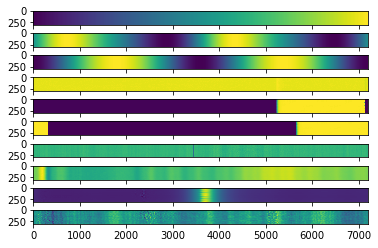

In [149]:
fig, axes = plt.subplots(10, 1, sharex=True)
for i, ax in enumerate(axes):
    ax.imshow(mat['CycMtr'][0, 0][i])


In [151]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'DnsAng', 'DnsCmb', 'DnsCrb', 'DnsEss', 'DnsMtr', 'DnsCyl', 'CycMtr', 'CycMoy', 'GrdPnt', 'GrdMRP'])

In [154]:
mat['__globals__']

[]